## Forecast Covid 19

#### Importando as bibliotecas

In [52]:
from __future__ import print_function

import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
import folium
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
from fbprophet import Prophet
from matplotlib import pyplot as plt
from matplotlib import rcParams

import seaborn as sns

##### Definindo as bases de dados

In [2]:
death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
recovered_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
country_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGIsandData/COVID-19/web-data/data/cases_country.csv")
covid_nacionais = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv')


#### Quantidade Total de Mortes no Mundo

In [3]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2592,2598,2611,2618,2625,2631,2637,2642,2648,2654
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2379,2383,2386,2389,2394,2396,2397,2399,2402,2403
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3217,3225,3234,3244,3253,3261,3270,3280,3289,3299
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,124,124,125,125,125,125,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,583,587,591,594,596,600,602,603,609,618


#### Quantidade de Casos Confirmados no Mundo

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529


#### Quantidade de Recuperados no Mundo

In [5]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,52520,52794,52974,53103,53206,53272,53391,53391,53694,53750
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,106465,107163,107887,108606,109338,110172,110920,111792,112626,113468
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,84440,84598,84745,84940,85108,85249,85398,85534,85693,85869
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12519,12561,12590,12650,12684,12684,12753,12793,12818,12884
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,23288,23341,23584,23606,23876,23913,23913,24190,24190,24492


#### Locais do Mundo Acometidos pela Covid 19

In [6]:
country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-05-06 21:20:45,33.93911,67.709953,61162.0,2664.0,53961.0,4537.0,157.114324,NaN,NaN,4.355646,4,AFG
1,Albania,2021-05-06 21:20:45,41.15330,20.168300,131510.0,2406.0,114362.0,14742.0,4569.810272,NaN,NaN,1.829519,8,ALB
2,Algeria,2021-05-06 21:20:45,28.03390,1.659600,123473.0,3307.0,86007.0,34159.0,281.573690,NaN,NaN,2.678318,12,DZA
3,Andorra,2021-05-06 21:20:45,42.50630,1.521800,13363.0,127.0,12900.0,336.0,17295.023620,NaN,NaN,0.950385,20,AND
4,Angola,2021-05-06 21:20:45,-11.20270,17.873900,27529.0,618.0,24492.0,2419.0,83.760651,NaN,NaN,2.244905,24,AGO


In [7]:
# Definindo os nomes das colunas para letras minúsculas

In [8]:
country_df.columns = map(str.lower, country_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)
death_df.columns = map(str.lower, death_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)



In [9]:
# Renomeando os nomes das colunas

In [10]:
confirmed_df = confirmed_df.rename(columns = {'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns = {'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns = {'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns = {'country_region': 'country'})

#### Quantidade de casos, mortes e recuperados no mundo

In [11]:
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [12]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 10px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmados: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:10px;'> Mortes: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:10px;'> Recuperados: " + str(recovered_total) + "</span>"+
             "</div>")
       )

#### Pegando 10 países em ordem cescente e definindo cores para as colunas

In [13]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False).head(10)

In [14]:
sorted_country_df

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
178,US,2021-05-06 21:20:45,40.000000,-100.000000,32598405.0,580012.0,NaN,NaN,9894.306848,NaN,NaN,1.779265,840,USA
79,India,2021-05-06 21:20:45,20.593684,78.962880,21077410.0,230168.0,17280844.0,3566398.0,1527.343698,NaN,NaN,1.092013,356,IND
23,Brazil,2021-05-06 21:20:45,-14.235000,-51.925300,14930183.0,414399.0,13269684.0,1246100.0,7024.004757,NaN,NaN,2.775579,76,BRA
62,France,2021-05-06 21:20:45,46.227600,2.213700,5789282.0,106011.0,368366.0,5314905.0,8869.266909,NaN,NaN,1.831160,250,FRA
177,Turkey,2021-05-06 21:20:45,38.963700,35.243300,4977982.0,42187.0,4626799.0,308996.0,5902.344165,NaN,NaN,0.847472,792,TUR
142,Russia,2021-05-06 21:20:45,61.524000,105.318800,4799872.0,110366.0,4421329.0,268177.0,3289.060034,NaN,NaN,2.299353,643,RUS
182,United Kingdom,2021-05-06 21:20:45,55.000000,-3.000000,4444257.0,127843.0,14897.0,4301517.0,6546.646935,NaN,NaN,2.876589,826,GBR
85,Italy,2021-05-06 21:20:45,41.871900,12.567400,4082198.0,122263.0,3557133.0,402802.0,6751.694639,NaN,NaN,2.995029,380,ITA
162,Spain,2021-05-06 21:20:45,40.463667,-3.749220,3559222.0,78726.0,150376.0,3330120.0,7612.530252,NaN,NaN,2.211888,724,ESP
66,Germany,2021-05-06 21:20:45,51.165691,10.451526,3491076.0,84239.0,3121130.0,285707.0,4166.760111,NaN,NaN,2.412981,276,DEU


#### tabulando dados e obtendo valores relevantes

In [15]:
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: purple'
    g = 'background-color: grey'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return country_df.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [16]:
# Importando bliblioteca para plotar os países com mais casos confirmados em ordem crescente

#### Top 10 Países com mais Casos Confirmados de Covid 19

In [17]:
def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
    fig.update_layout(
    title=str(n) +" Países",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=10)



interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.bubble_chart(n)>

In [18]:
# importando biblioteca para plotar gráficos com informações de confirmados e de morte por país

In [19]:
def plot_cases_for_country(country): 
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6,8]
    line_size = [4,5]

    df_list = [confirmed_df, death_df]

    fig = go.Figure()

    for i, df in enumerate(df_list):
        if country == 'World' or country == "world":
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df.iloc[:, 5:]), axis=0)
        else:
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,5:]), axis=0)
            
            fig.add_trace(go.Scatter(x = x_data, y = y_data, mode = 'lines+markers', 
                                    name = labels[i],
                                    line = dict(color = colors[i], width = line_size[i]),
                                    connectgaps = True,
                                    text = 'Total ' + str(labels[i]) + ": "+ str(y_data[-1])
                                    ))
    fig.show()
    
# plot_cases_for_country('Brazil')

interact(plot_cases_for_country, country='World');

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

In [20]:
covid_nacionais.tail()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
129245,2021-05-01,Zimbabwe,NaN,38260,35620.0,1568
129246,2021-05-02,Zimbabwe,NaN,38281,35634.0,1570
129247,2021-05-03,Zimbabwe,NaN,38293,35647.0,1573
129248,2021-05-04,Zimbabwe,NaN,38327,35775.0,1574
129249,2021-05-05,Zimbabwe,NaN,38357,35811.0,1574


In [21]:
df = covid_nacionais
df_filtered = df[df['Country/Region'] == 'Brazil']

In [22]:
df_filtered.tail()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
14565,2021-05-01,Brazil,NaN,14725975,13023892.0,406437
14566,2021-05-02,Brazil,NaN,14754910,13083550.0,407639
14567,2021-05-03,Brazil,NaN,14779529,13135143.0,408622
14568,2021-05-04,Brazil,NaN,14856888,13170561.0,411588
14569,2021-05-05,Brazil,NaN,14930183,13254660.0,414399


In [23]:
mortes = df_filtered.groupby('Date').sum()['Deaths'].reset_index()
mortes.tail()

,Date,Deaths
465,2021-05-01,406437
466,2021-05-02,407639
467,2021-05-03,408622
468,2021-05-04,411588
469,2021-05-05,414399


#### Quantidade de Mortes Acumuladas no Brasil

<AxesSubplot:>

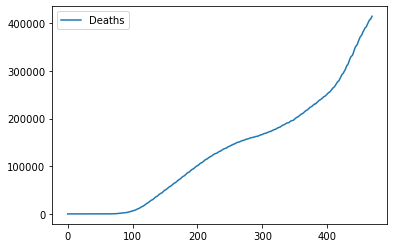

In [24]:
mortes.plot()

In [25]:
mortes.columns = ['ds', 'y']
mortes.tail()

,ds,y
465,2021-05-01,406437
466,2021-05-02,407639
467,2021-05-03,408622
468,2021-05-04,411588
469,2021-05-05,414399


In [26]:
dias = 90
m = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=True)
m.fit(mortes)
futuro = m.make_future_dataframe(periods = dias)
futuro.tail()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,ds
555,2021-07-30
556,2021-07-31
557,2021-08-01
558,2021-08-02
559,2021-08-03


In [27]:
previsao = m.predict(futuro)
previsao.head(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,6300.056946,-964.361501,389.266257,6300.056946,6300.056946,-6592.086834,-6592.086834,-6592.086834,25201.945114,...,-7.811686,-7.811686,-7.811686,-31786.220261,-31786.220261,-31786.220261,0.0,0.0,0.0,-292.029887
1,2020-01-23,7070.599925,-743.460191,668.487941,7070.599925,7070.599925,-7119.206134,-7119.206134,-7119.206134,25201.945114,...,194.909621,194.909621,194.909621,-32516.060870,-32516.060870,-32516.060870,0.0,0.0,0.0,-48.606209
2,2020-01-24,7841.142904,-563.820055,767.072117,7841.142904,7841.142904,-7744.011512,-7744.011512,-7744.011512,25201.945114,...,298.620670,298.620670,298.620670,-33244.577296,-33244.577296,-33244.577296,0.0,0.0,0.0,97.131392
3,2020-01-25,8611.685883,-563.924399,812.978082,8611.685883,8611.685883,-8478.025462,-8478.025462,-8478.025462,25201.945114,...,292.852463,292.852463,292.852463,-33972.823040,-33972.823040,-33972.823040,0.0,0.0,0.0,133.660421
4,2020-01-26,9382.228862,-857.780639,511.769640,9382.228862,9382.228862,-9589.438942,-9589.438942,-9589.438942,25201.945114,...,-89.512293,-89.512293,-89.512293,-34701.871764,-34701.871764,-34701.871764,0.0,0.0,0.0,-207.210080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2020-04-16,9970.486180,1732.373125,3109.129830,9970.486180,9970.486180,-7580.591327,-7580.591327,-7580.591327,25201.945114,...,194.909621,194.909621,194.909621,-32977.446063,-32977.446063,-32977.446063,0.0,0.0,0.0,2389.894853
86,2020-04-17,9072.010039,1828.036170,3207.101695,9072.010039,9072.010039,-6560.828448,-6560.828448,-6560.828448,25201.945114,...,298.620670,298.620670,298.620670,-32061.394232,-32061.394232,-32061.394232,0.0,0.0,0.0,2511.181591
87,2020-04-18,8173.533898,1774.889828,3119.547857,8173.533898,8173.533898,-5687.861189,-5687.861189,-5687.861189,25201.945114,...,292.852463,292.852463,292.852463,-31182.658766,-31182.658766,-31182.658766,0.0,0.0,0.0,2485.672709
88,2020-04-19,7275.057757,1333.219593,2732.011733,7275.057757,7275.057757,-5229.510336,-5229.510336,-5229.510336,25201.945114,...,-89.512293,-89.512293,-89.512293,-30341.943158,-30341.943158,-30341.943158,0.0,0.0,0.0,2045.547421


In [28]:
    previsao[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
470,2021-05-06,416441.518780,417138.152334,417803.651350
471,2021-05-07,418814.801498,419585.261150,420302.415914
472,2021-05-08,421111.038759,421934.556941,422711.944763
473,2021-05-09,423165.294223,423921.373271,424760.612740
474,2021-05-10,425001.950618,425931.208535,426967.424746
...,...,...,...,...
555,2021-07-30,569391.113374,630272.178849,688739.975959
556,2021-07-31,570386.796794,632597.700977,692257.673156
557,2021-08-01,571300.385155,634538.895244,695878.729805
558,2021-08-02,572344.815648,636478.861875,698397.873826


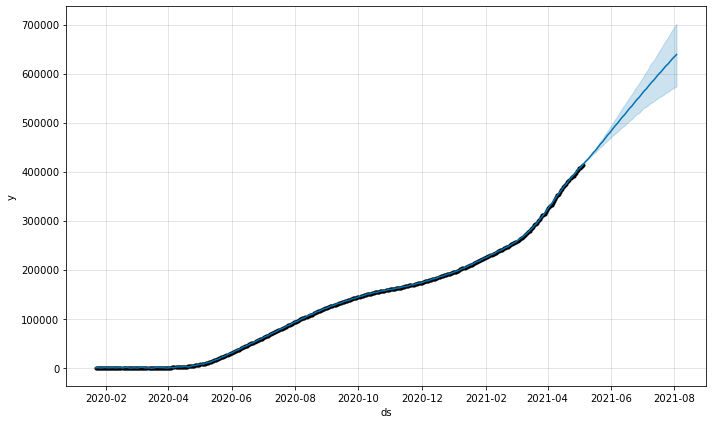

In [29]:
death_forecast_plot = m.plot(previsao)

In [30]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)

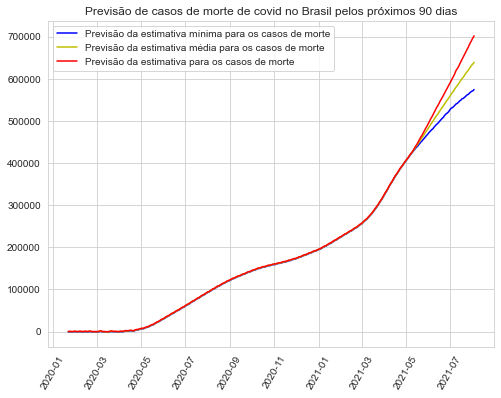

In [31]:
previsao.columns = ['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat']

df = previsao[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]

x = previsao['ds']
y = previsao['yhat_lower']
y2 = previsao['yhat']
y3 = previsao['yhat_upper']

plt.figure(figsize=(8,6))
plt.xticks(rotation=60)
plt.title('Previsão de casos de morte de covid no Brasil pelos próximos 90 dias')
plt.plot(x, y, c= 'b', label='Previsão da estimativa mínima para os casos de morte')
plt.plot(x, y2, c= 'y', label='Previsão da estimativa média para os casos de morte')
plt.plot(x, y3, c= 'r', label='Previsão da estimativa para os casos de morte')
plt.legend(loc=0)
plt.show()

#### Previsão quantidade de contaminados por covid 19 pelos próximos 90 dias

In [32]:
confirmados = df_filtered.groupby('Date').sum()['Confirmed'].reset_index()
confirmados.tail()

,Date,Confirmed
465,2021-05-01,14725975
466,2021-05-02,14754910
467,2021-05-03,14779529
468,2021-05-04,14856888
469,2021-05-05,14930183


<AxesSubplot:>

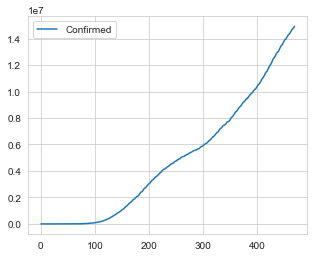

In [33]:
confirmados.plot()

In [34]:
confirmados.columns = ['ds', 'y']
confirmados.tail()

,ds,y
465,2021-05-01,14725975
466,2021-05-02,14754910
467,2021-05-03,14779529
468,2021-05-04,14856888
469,2021-05-05,14930183


In [35]:
m = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=True)
m.fit(confirmados)
futuro = m.make_future_dataframe(periods = dias)
futuro.tail()

,ds
555,2021-07-30
556,2021-07-31
557,2021-08-01
558,2021-08-02
559,2021-08-03


In [36]:
previsao = m.predict(futuro)
previsao.head(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,69750.877972,-38809.590968,7647.031524,69750.877972,69750.877972,-85746.562003,-85746.562003,-85746.562003,278511.113595,...,-1905.061835,-1905.061835,-1905.061835,-362352.613763,-362352.613763,-362352.613763,0.0,0.0,0.0,-15995.684030
1,2020-01-23,83833.560203,-29472.216226,20615.318916,83833.560203,83833.560203,-89133.967077,-89133.967077,-89133.967077,278511.113595,...,5308.940465,5308.940465,5308.940465,-372954.021137,-372954.021137,-372954.021137,0.0,0.0,0.0,-5300.406874
2,2020-01-24,97916.242433,-22092.631493,27494.418345,97916.242433,97916.242433,-94897.429758,-94897.429758,-94897.429758,278511.113595,...,10280.360918,10280.360918,10280.360918,-383688.904271,-383688.904271,-383688.904271,0.0,0.0,0.0,3018.812676
3,2020-01-25,111998.924664,-14824.345928,32839.825569,111998.924664,111998.924664,-104297.942349,-104297.942349,-104297.942349,278511.113595,...,11825.045195,11825.045195,11825.045195,-394634.101140,-394634.101140,-394634.101140,0.0,0.0,0.0,7700.982314
4,2020-01-26,126081.606894,-24322.551844,23201.462844,126081.606894,126081.606894,-127686.285494,-127686.285494,-127686.285494,278511.113595,...,-333.539370,-333.539370,-333.539370,-405863.859720,-405863.859720,-405863.859720,0.0,0.0,0.0,-1604.678600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2020-04-16,340765.550674,16263.544136,66433.270843,340765.550674,340765.550674,-298526.492941,-298526.492941,-298526.492941,278511.113595,...,5308.940465,5308.940465,5308.940465,-582346.547001,-582346.547001,-582346.547001,0.0,0.0,0.0,42239.057733
86,2020-04-17,342020.029349,22749.822333,73268.183069,342020.029349,342020.029349,-294348.752971,-294348.752971,-294348.752971,278511.113595,...,10280.360918,10280.360918,10280.360918,-583140.227484,-583140.227484,-583140.227484,0.0,0.0,0.0,47671.276378
87,2020-04-18,343274.508024,24981.375890,74719.575194,343274.508024,343274.508024,-294150.807613,-294150.807613,-294150.807613,278511.113595,...,11825.045195,11825.045195,11825.045195,-584486.966403,-584486.966403,-584486.966403,0.0,0.0,0.0,49123.700411
88,2020-04-19,344528.986699,15245.852757,61253.836561,344528.986699,344528.986699,-308180.882965,-308180.882965,-308180.882965,278511.113595,...,-333.539370,-333.539370,-333.539370,-586358.457190,-586358.457190,-586358.457190,0.0,0.0,0.0,36348.103734


In [37]:
 previsao[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
470,2021-05-06,1.497148e+07,1.499766e+07,1.502144e+07
471,2021-05-07,1.503914e+07,1.506297e+07,1.508887e+07
472,2021-05-08,1.509999e+07,1.512536e+07,1.514873e+07
473,2021-05-09,1.514944e+07,1.517459e+07,1.520259e+07
474,2021-05-10,1.519341e+07,1.522185e+07,1.525445e+07
...,...,...,...,...
555,2021-07-30,2.012454e+07,2.155492e+07,2.289659e+07
556,2021-07-31,2.017531e+07,2.163609e+07,2.299765e+07
557,2021-08-01,2.024094e+07,2.170336e+07,2.307734e+07
558,2021-08-02,2.029487e+07,2.176790e+07,2.317693e+07


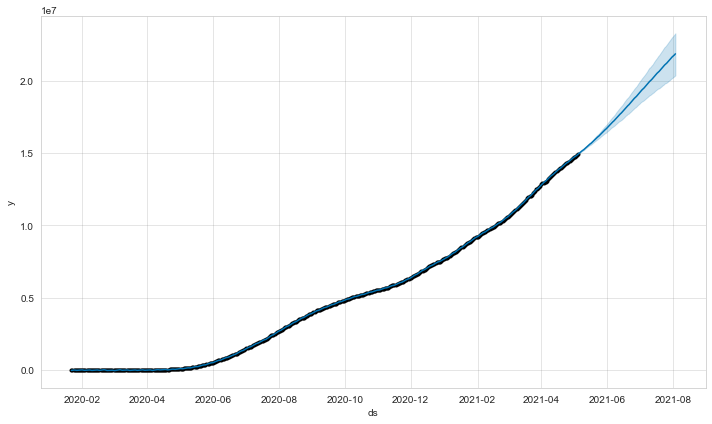

In [38]:
confirmed_forecast_plot = m.plot(previsao)

In [39]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')


#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)

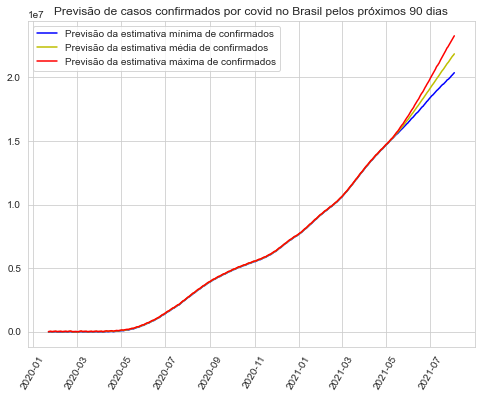

In [40]:
previsao.columns = ['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat']

df = previsao[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]

x = previsao['ds']
y = previsao['yhat_lower']
y2 = previsao['yhat']
y3 = previsao['yhat_upper']

plt.figure(figsize=(8,6))
plt.xticks(rotation=60)
plt.title('Previsão de casos confirmados por covid no Brasil pelos próximos 90 dias')
plt.plot(x, y, c= 'b', label='Previsão da estimativa mínima de confirmados')
plt.plot(x, y2, c= 'y', label='Previsão da estimativa média de confirmados')
plt.plot(x, y3, c= 'r', label='Previsão da estimativa máxima de confirmados')
plt.legend(loc=0)
plt.show()

#### Previsão quantidade de recuerados do covid 19 pelos próximos 90 dias

In [41]:
recuperados = df_filtered.groupby('Date').sum()['Recovered'].reset_index()
recuperados.tail()

,Date,Recovered
465,2021-05-01,13023892.0
466,2021-05-02,13083550.0
467,2021-05-03,13135143.0
468,2021-05-04,13170561.0
469,2021-05-05,13254660.0


<AxesSubplot:>

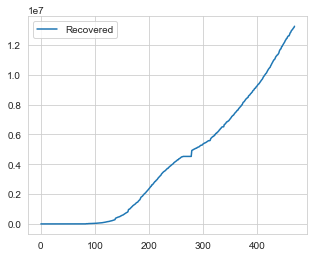

In [42]:
recuperados.plot()

In [43]:
recuperados.columns = ['ds', 'y']
recuperados.tail()

,ds,y
465,2021-05-01,13023892.0
466,2021-05-02,13083550.0
467,2021-05-03,13135143.0
468,2021-05-04,13170561.0
469,2021-05-05,13254660.0


In [44]:
m = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=True)
m.fit(recuperados)
futuro = m.make_future_dataframe(periods = dias)
futuro.tail()

,ds
555,2021-07-30
556,2021-07-31
557,2021-08-01
558,2021-08-02
559,2021-08-03


In [45]:
previsao = m.predict(futuro)
previsao.head(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,105573.908899,-67099.414322,49574.927583,105573.908899,105573.908899,-112996.813690,-112996.813690,-112996.813690,422060.954452,...,3315.692856,3315.692856,3315.692856,-538373.460998,-538373.460998,-538373.460998,0.0,0.0,0.0,-7422.904791
1,2020-01-23,118286.472380,-58136.170157,55291.935109,118286.472380,118286.472380,-122291.418292,-122291.418292,-122291.418292,422060.954452,...,4766.614755,4766.614755,4766.614755,-549118.987498,-549118.987498,-549118.987498,0.0,0.0,0.0,-4004.945912
2,2020-01-24,130999.035861,-61806.037289,54768.930593,130999.035861,130999.035861,-134111.242220,-134111.242220,-134111.242220,422060.954452,...,3597.146953,3597.146953,3597.146953,-559769.343625,-559769.343625,-559769.343625,0.0,0.0,0.0,-3112.206359
3,2020-01-25,143711.599342,-59678.050954,56424.717691,143711.599342,143711.599342,-146630.154745,-146630.154745,-146630.154745,422060.954452,...,1696.712797,1696.712797,1696.712797,-570387.821993,-570387.821993,-570387.821993,0.0,0.0,0.0,-2918.555403
4,2020-01-26,156424.162823,-70796.306317,44054.062881,156424.162823,156424.162823,-165711.615835,-165711.615835,-165711.615835,422060.954452,...,-6738.543728,-6738.543728,-6738.543728,-581034.026558,-581034.026558,-581034.026558,0.0,0.0,0.0,-9287.453012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2020-04-16,549910.870929,-44481.054020,76361.787544,549910.870929,549910.870929,-532672.268718,-532672.268718,-532672.268718,422060.954452,...,4766.614755,4766.614755,4766.614755,-959499.837925,-959499.837925,-959499.837925,0.0,0.0,0.0,17238.602211
86,2020-04-17,546770.678754,-40351.219840,73824.165594,546770.678754,546770.678754,-530558.628424,-530558.628424,-530558.628424,422060.954452,...,3597.146953,3597.146953,3597.146953,-956216.729828,-956216.729828,-956216.729828,0.0,0.0,0.0,16212.050331
87,2020-04-18,543630.486579,-42973.204543,71384.175200,543630.486579,543630.486579,-529273.803411,-529273.803411,-529273.803411,422060.954452,...,1696.712797,1696.712797,1696.712797,-953031.470659,-953031.470659,-953031.470659,0.0,0.0,0.0,14356.683168
88,2020-04-19,540490.294404,-50039.646069,64054.343511,540490.294404,540490.294404,-534633.298661,-534633.298661,-534633.298661,422060.954452,...,-6738.543728,-6738.543728,-6738.543728,-949955.709385,-949955.709385,-949955.709385,0.0,0.0,0.0,5856.995743


In [46]:
 previsao[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
470,2021-05-06,1.326426e+07,1.332219e+07,1.337772e+07
471,2021-05-07,1.332352e+07,1.337770e+07,1.343576e+07
472,2021-05-08,1.337392e+07,1.343240e+07,1.349342e+07
473,2021-05-09,1.342254e+07,1.348053e+07,1.353747e+07
474,2021-05-10,1.347654e+07,1.353556e+07,1.359151e+07
...,...,...,...,...
555,2021-07-30,1.872850e+07,1.966595e+07,2.061443e+07
556,2021-07-31,1.882018e+07,1.974373e+07,2.070564e+07
557,2021-08-01,1.885525e+07,1.981498e+07,2.077488e+07
558,2021-08-02,1.890695e+07,1.989321e+07,2.090595e+07


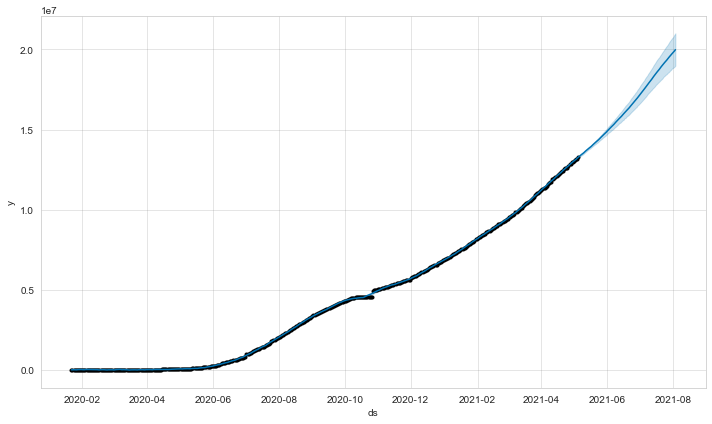

In [47]:
recovered_forecast_plot = m.plot(previsao)

In [48]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')


#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)

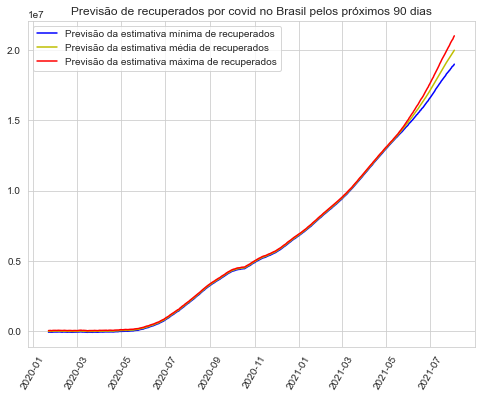

In [49]:
previsao.columns = ['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat']

df = previsao[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]

x = previsao['ds']
y = previsao['yhat_lower']
y2 = previsao['yhat']
y3 = previsao['yhat_upper']

plt.figure(figsize=(8,6))
plt.xticks(rotation=60)
plt.title('Previsão de recuperados por covid no Brasil pelos próximos 90 dias')
plt.plot(x, y, c= 'b', label='Previsão da estimativa mínima de recuperados')
plt.plot(x, y2, c= 'y', label='Previsão da estimativa média de recuperados')
plt.plot(x, y3, c= 'r', label='Previsão da estimativa máxima de recuperados')
plt.legend(loc=0)
plt.show()